# STEP 1: Set up your analysis

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Import packages</div></div><div class="callout-body-container callout-body"><p>Add imports for packages that help you:</p>
<ol type="1">
<li>Work with the file system interoperably</li>
<li>Work with vector data</li>
<li>Create interactive plots of vector data</li>
</ol></div></div>

In [7]:
%%bash
pip install pandas geopandas contextily matplotlib

In [8]:
import os
import pathlib
import pandas as pd
import matplotlib.pyplot as plt

import geopandas as gpd
# retrieve tile maps 
import contextily as ctx

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Prepare data directory</div></div><div class="callout-body-container callout-body"><p>In the cell below, <strong>reproducibly and interoperably</strong>
define and create a project data directory somewhere in your home
folder. Be careful not to save data files to your <code>git</code>
repository!</p></div></div>

In [3]:
# Define and create the project data directory

data_dir = os.path.join(
    # Home directory
    pathlib.Path.home(),
    # Earth analytics data directory
    'earth-analytics',
    'data',
    # Project directory
    'denver-redlining',
)
os.makedirs(data_dir, exist_ok=True)

## STEP 2: Site map

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Define your study area</div></div><div class="callout-body-container callout-body"><ol type="1">
<li>Copy the <strong>geopackage</strong> URL for the <a
href="https://dsl.richmond.edu/panorama/redlining/data">University of
Richmond</a></li>
<li>Load the <em>vector</em> data into Python, making sure to cache the
download so you don’t have to run it multiple times.</li>
<li>Create a quick plot to check the data</li>
</ol></div></div>

In [4]:
# Define url for redlining download
us_census_redlining_url = 'https://dsl.richmond.edu/panorama/redlining/static/mappinginequality.gpkg'

# Set up a path to save the data locally
us_census_survey_dir = os.path.join(data_dir, 'us_census_survey')

# Make the U.S. Census Survey directory
os.makedirs(us_census_survey_dir, exist_ok=True)

# Join redlining geopackage path
redlining_map_path = os.path.join(us_census_survey_dir, 'redlining_map.gpkg')

# Only download once and create GeoDataFrame
if not os.path.exists(redlining_map_path):
    redlining_gdf = gpd.read_file(us_census_redlining_url)
    redlining_gdf.to_file(redlining_map_path)

# Load from file
redlining_gdf = (
    gpd.read_file(redlining_map_path)
)

# Check the data
redlining_gdf

,area_id,city,state,city_survey,category,grade,label,residential,commercial,industrial,fill,geometry
0,244,Birmingham,AL,True,Best,A,A1,True,False,False,#76a865,"MULTIPOLYGON (((-86.75678 33.49754, -86.75653 ..."
1,193,Birmingham,AL,True,Best,A,A2,True,False,False,#76a865,"MULTIPOLYGON (((-86.75867 33.50933, -86.76134 ..."
2,206,Birmingham,AL,True,Best,A,A3,True,False,False,#76a865,"MULTIPOLYGON (((-86.75678 33.49754, -86.75692 ..."
3,203,Birmingham,AL,True,Still Desirable,B,B1,True,False,False,#7cb5bd,"MULTIPOLYGON (((-86.80111 33.48071, -86.80505 ..."
4,189,Birmingham,AL,True,Still Desirable,B,B10,True,False,False,#7cb5bd,"MULTIPOLYGON (((-86.74923 33.53333, -86.74971 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
10149,6518,Wheeling,WV,True,Hazardous,D,D4,True,False,False,#d9838d,"MULTIPOLYGON (((-80.71985 40.06376, -80.71943 ..."
10150,6520,Wheeling,WV,True,Hazardous,D,D5,True,False,False,#d9838d,"MULTIPOLYGON (((-80.72854 40.06729, -80.7287 4..."
10151,6516,Wheeling,WV,True,Hazardous,D,D6,True,False,False,#d9838d,"MULTIPOLYGON (((-80.72216 40.06134, -80.72247 ..."
10152,6512,Wheeling,WV,True,Hazardous,D,D7,True,False,False,#d9838d,"MULTIPOLYGON (((-80.6474 40.04886, -80.64842 4..."


<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Create an interactive site map</div></div><div class="callout-body-container callout-body"><p>In the cell below:</p>
<ol type="1">
<li>Select only the data where the <code>city</code> column is equal to
<code>"Denver"</code>.</li>
<li>For now, dissolve the regions with the <code>.dissolve()</code>
method so we see only a map of Denver.</li>
<li>Plot the data with the <code>EsriImagery</code> tile source basemap.
Make sure we can see your basemap underneath!</li>
</ol></div></div>

In [9]:
denver_redlining_gdf = redlining_gdf.loc[redlining_gdf['city'] == 'Denver']

denver_redlining_gdf = denver_redlining_gdf[['city', 'geometry']]

# dissolve all the geometries within a given group (Denver) into a single geometric feature
denver_map = denver_redlining_gdf.dissolve(by='city')

denver_map

,geometry
city,
Denver,"MULTIPOLYGON (((-104.99486 39.64563, -104.997 ..."


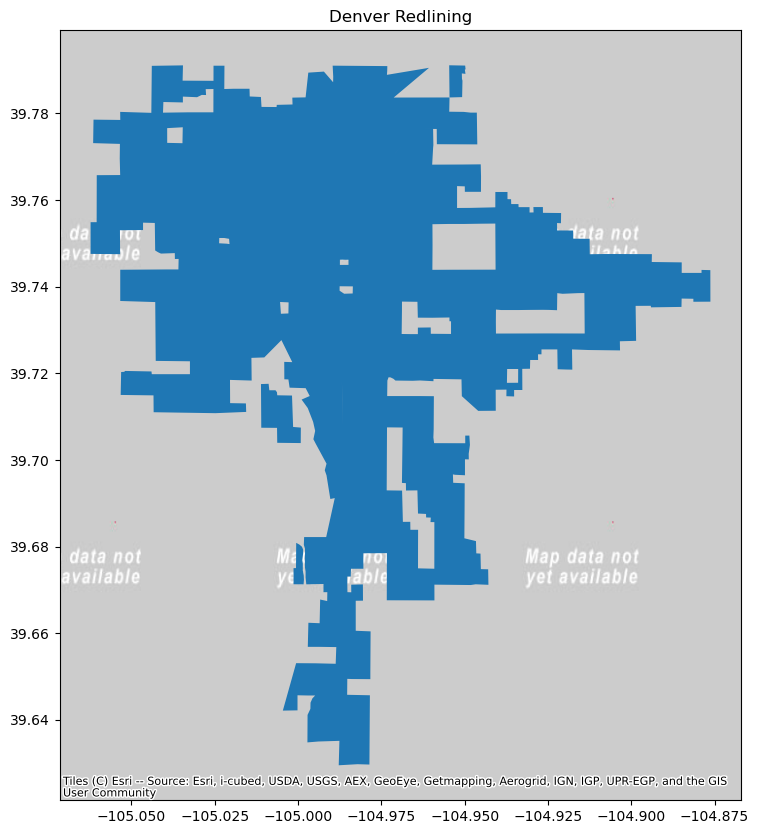

In [12]:
# Plot the map 
ax = denver_map.plot(figsize=(10, 10))

# Use EsriImagery tile source basemap from contextily 
# Esri provider objects: https://contextily.readthedocs.io/en/latest/providers_deepdive.html
ctx.add_basemap(ax, source=ctx.providers.Esri.WorldImagery)

ax.set_title("Denver Redlining")
plt.show()

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-respond"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Reflect and Respond: Write a site description</div></div><div class="callout-body-container callout-body"><p>Your site description should address:</p>
<ol type="1">
<li>Is there anything relevant to this analysis that you notice in your
site map?</li>
<li>Research about the <strong>context</strong> of this analysis. You
could include information about the climate and history of the Denver
area. How might racism, water rights, or other societal forces have
influenced the distribution of urban green space in Denver? Aim for a
paragraph of text.</li>
<li>Citations for the site data and your context sources.</li>
</ol></div></div>

YOUR SITE DESCRIPTION HERE

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Store variables</div></div><div class="callout-body-container callout-body"><p>Store any variables you want for later. This should definitely
include your un-dissolved denver redlining <code>GeoDataFrame</code> and
your data directory path.</p></div></div>

In [13]:
%store denver_redlining_gdf data_dir

Stored 'denver_redlining_gdf' (GeoDataFrame)
Stored 'data_dir' (str)
